/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/notebooks
/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/images/coins.png


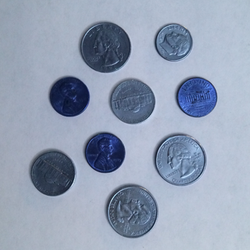

(250, 250, 3)

In [4]:
# USAGE
# python blurring.py --image ../images/beach.png
import os
import argparse
import pathlib
from typing import Union, Any

import mahotas
import cv2
import imutils
# Import the necessary packages
import numpy as np
from PIL import Image
from IPython.display import display
# Import the necessary packages
from matplotlib import pyplot as plt

# Construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, help="Path to the image")
# args = vars(ap.parse_args())

args = {}

current_folder = pathlib.Path(
    f"/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/notebooks")
print(current_folder)

# # Calculating path to the input data
args["image"] = pathlib.Path(
    f"{current_folder.parent}/images/coins.png").resolve()

print(args["image"])

assert args["image"].exists()

# _image = f"{args['image']}"
image: Union[np.ndarray, Any]
# # # Load the image and show it
image = cv2.imread(f"{args['image']}")

# Load the image, convert it to grayscale, and blur it slightly
# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (11, 11), 0)

# SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
display(Image.fromarray(image))

image.shape


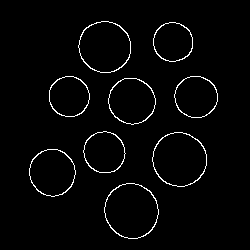

In [5]:
# The first thing we are going to do is apply edge detection to
# the image to reveal the outlines of the coins
edged = cv2.Canny(blurred, 30, 150)

# SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
display(Image.fromarray(edged))

In [6]:
# Find contours in the edged image.
# NOTE: The cv2.findContours method is DESTRUCTIVE to the image
# you pass in. If you intend on reusing your edged image, be
# sure to copy it before calling cv2.findContours
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)


# How many contours did we find?
print("I count {} coins in this image".format(len(cnts)))

I count 9 coins in this image


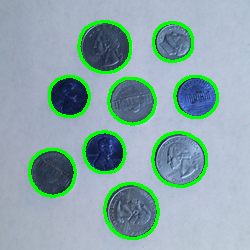

In [7]:
# Let's highlight the coins in the original image by drawing a
# green circle around them
coins = image.copy()
# -1 = find all of them
# (0, 255, 0) = green
# 2 = thickness
cv2.drawContours(coins, cnts, -1, (0, 255, 0), 2)
# SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
display(Image.fromarray(coins))

Coin #1


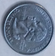

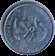

Coin #2


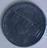

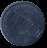

Coin #3


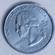

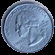

Coin #4


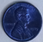

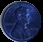

Coin #5


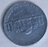

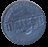

Coin #6


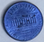

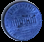

Coin #7


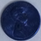

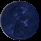

Coin #8


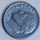

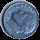

Coin #9


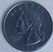

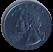

In [9]:
# Now, let's loop over each contour
for (i, c) in enumerate(cnts):
    # We can compute the 'bounding box' for each contour, which is
    # the rectangle that encloses the contour
    (x, y, w, h) = cv2.boundingRect(c)

    # Now that we have the contour, let's extract it using array
    # slices
    print("Coin #{}".format(i + 1))
    coin = image[y : y + h, x : x + w]
    display(Image.fromarray(coin))

    # Just for fun, let's construct a mask for the coin by finding
    # The minumum enclosing circle of the contour
    mask = np.zeros(image.shape[:2], dtype="uint8")
    ((centerX, centerY), radius) = cv2.minEnclosingCircle(c)
    cv2.circle(mask, (int(centerX), int(centerY)), int(radius), 255, -1)
    mask = mask[y : y + h, x : x + w]
    display(Image.fromarray(cv2.bitwise_and(coin, coin, mask=mask)))